# Lista 2 (7 pkt.)

In [2]:
import string
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

## Zadanie 1. (1 pkt)

To zadanie należy wykonać ręcznie, bez używania komputera, korzystając z instrukcji z **one_time_pad.pdf**. Zaszyfruj wiadomość o treści: "NEW 15 HELICOPTERS.", za pomocą klucza: 68496 47757 10126 36660 25066. Do słów, które są w tabeli poniżej użyj odpowiednio ich kodów. Uwaga: w wiadomości jest liczba mnoga "helicopterS".

$\begin{array}{|c|c|c|c|c|c|c|c|c|c|}
\hline
CODE&A&E&I&N&O&T&&\\
0&1&2&3&4&5&6&&&\\
\hline
B&C&D&F&G&H&J&K&L&M\\
70&71&72&73&74&75&76&77&78&79\\
\hline
P&Q&R&S&U&V&W&X&Y&Z\\
80&81&82&83&84&85&86&87&88&89\\
\hline
FIG&.&:&,/'&(/)&+&-&=&REG/?&SPC\\
90&91&92&93&94&95&96&97&98&99\\
\hline
\end{array}$

$\begin{array}{|cc|cc|cc|cc|}
\hline
000&ABORT&253&DECODE&505&MILITARY&758&STREET\\
\hline
019&ACCEPT&262&DELAY&514&MONEY&767&SUBWAY\\
\hline
028&ACCESS&271&DIFFICULT&523&MONTH&776&SUCCESS\\
\hline
037&ADDRESS&280&DOCUMENT&532&MORNING&785&SUPPLY\\
\hline
046&AFFIRMATIVE&299&ENCODE&541&MORSE&794&SUPPORT\\
\hline
055&AGENT&307&EVENING&550&NEGATIVE&802&TELEPHONE\\
\hline
064&AIRPLANE&316&EXECUTE&569&NIGHT&811&TODAY\\
\hline
073&AIRPORT&325&FACTORY&578&OBSERVATION&820&TOMORROW\\
\hline
082&ANSWER&334&FAILED&587&PASSPORT&839&TRAIN\\
\hline
091&AUTHORITY&343&FERRY&596&PERSON&848&TRANSFER\\
\hline
109&BETWEEN&352&FLIGHT&604&PHOTOGRAPH&857&TRANSMIT\\
\hline
118&BORDER&361&FREQUENCY&613&POSITIVE&866&TRAVEL\\
\hline
127&BUILDING&370&HARBOUR&622&POSSIBLE&875&TRUCK\\
\hline
136&CANCEL&389&HELICOPTER&631&POWER&884&UNABLE TO\\
\hline
145&CHANGE&398&HIGHWAY&640&PRIORITY&893&URGENT\\
\hline
154&CIVILIAN&406&IDENTITY&659&PROBLEM&901&VERIFY\\
\hline
163&COMPROMISE&415&IMMEDIATE&668&QUESTION&910&WEEK\\
\hline
172&COMPUTER&424&IMPOSSIBLE&677&RADIO&929&WITHIN\\
\hline
181&CONFIRM&433&INFORMATION&686&RECEIVE&938&YESTERDAY\\
\hline
190&CONTACT&442&INSTRUCTIONS&695&RENDEZVOUS&&\\
\hline
208&COORDINATE&451&LOCATE&703&REPEAT&&\\
\hline
217&COUNTRY&460&LOCATION&712&RESERVATION&&\\
\hline
226&COVERT&479&MAIL&721&ROUTINE&\\
\hline
235&CURRENT&488&MEETING&730&SATELLITE&\\
\hline
244&DANGER&497&MESSAGE&749&SHIP&\\
\hline
\end{array}$

N   E     W        1    5          HELICOPTER     S
4   2   86  90  111  555    90      0389       83

Message: KEYID 42869 01115 55900 38983 
KEY:     68496 47757 10126 36660 25066
CIPHER:  68496 05112 91099 29340 13927

## Zadanie 2 (1 pkt)

To zadanie również jest do zrobienia ręcznie. Używając klucza 11454 03055 15565 17466 26950 54906 odkoduj wiadomość 11454 00572 94578 25863 84286 24376. Wykorzystaj instrukcje z **one_time_pad.pdf** oraz tablicę kodów z Zadania 1. 


MSG:                 11454 00572 94578 25863 84286 24376
KEY:                 11454 03055 15565 17466 26950 54906
RE-CONVERTED:        03527 09033 32229 00136 78272

DECRYPTED:       0352     70  90 333 222  90 0136   78 2  72
                  FLIGHT   B       3   2      CANCEL  L E  D


## Zadanie 3. (1 pkt)

Wczytaj obrazki 'miki.png' oraz 'quest.png'.

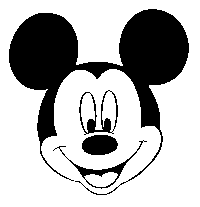

In [398]:
img1 = Image.open('miki.png').convert('L')
img1

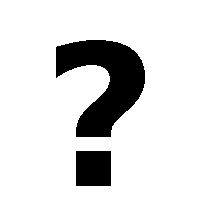

In [399]:
img2 = Image.open('quest.png').convert('L')
img2

Napisz funkcję **add_pic(img1, img2)**, która przyjmuje dwa obrazki i je dodaje piksel po pikselu za pomocą XOR, czyli **biały+biały=czarny, biały+czarny=biały, czarny+czarny=czarny**. Warto wykorzystać to, że **np.array(img)** zwraca tablicę, z wartościami 255 dla białych pikseli i 0 dla czarnych, aby zamienić tablicę z powrotem na obraz należy użyc **Image.fromarray()** przy czym tablica musi być typu **np.uint8** czyli tworząc tablicę podajemy typ: **np.array([1,2,3,4], dtype=np.uint8)**. Funkcja ma zwracać obrazek.

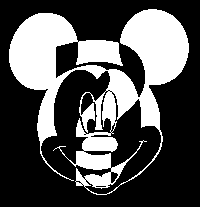

In [400]:
def add_pic(img1, img2):
    combined_img = []
    img1, img2 = np.array(img1), np.array(img2)
    
    for row in range(len(img1)):
        img_row = []
        for pixel in range(len(img1[row])):
            img_row.append(img1[row][pixel] ^ img2[row][pixel])
        combined_img.append(img_row)
    return Image.fromarray(np.array(combined_img, dtype=np.uint8))

add_pic(img1, img2)

Wygeneruj (pseudo)losowy klucz, czyli obrazek z losowymi białymi i czarnymi pikselami, użyj **np.random**. Następnie zaszyfruj tym kluczem, za pomocą **add_pic**, oba obrazki **img1** i **img2**. Zauważ, że oba obrazki wyglądają na dobrze zaszyfrowane, zobacz jednak co się wydarzy kiedy dodasz do siebie te zaszyfrowane obrazki.

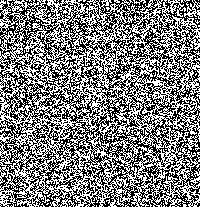

In [401]:
random_photo = np.random.choice([0, 255], size=(img1.size[1], img1.size[0]))
random_photo = np.array(random_photo, dtype=np.uint8)

Image.fromarray(random_photo)

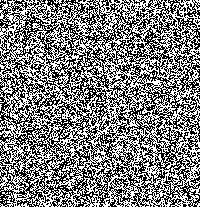

In [402]:
img1_encrypted = add_pic(img1, random_photo)
img1_encrypted

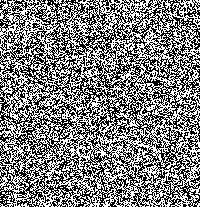

In [403]:
img2_encrypted = add_pic(img2, random_photo)
img2_encrypted

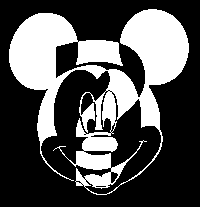

In [404]:
add_pic(img1_encrypted, img2_encrypted)

## Zadanie 4 (2 pkt.)

Zmienne ***msg1_enc*** oraz ***msg2_enc*** zawierają dwie zaszyfrowane wiadomości, w języku angielskim.

In [6]:
msg1_enc = '\x1e\x17\x0c\x12\x1b\x08\x0cf\x0e\x11x\x1a\x1c\x12o\x06\x18\x1f\x17\x03\x10\x01fkh\x1f\x08'
msg2_enc = '\x0b\ni\x07\x1c\x02k\x1f\x16e\x01\x0b\x07\x03\n\x15\x15\x0c\x1el\x07\x03\x03\x16\x01\x01\x02'

Wiadomo, że zostały zaszyfrowane tym samym kluczem, możemy to wykorzystać do odszyfrowania ich. W tym zadaniu konwencja zamiany liter na liczby i ich dodawania jest inna, niż w poprzednich. Znaki zamieniamy na liczby kodujące te znaki w **Unicode**, czyli za pomocą **ord()**, następnie dodajemy je do siebie za pomocą XOR na poziomie bitów, czyli za pomocą **^**. Napisz funkcję **add_str(msg1, msg2)**, które przyjmuje dwa teksty i zwraca tekst będący sumą tych tekstów zgodnie z powyższą konwencją.

In [7]:
def add_str(msg1, msg2):
    xored_message = ""
    for i in range(len(msg1)):
        char1 = ord(msg1[i])
        char2 = ord(msg2[i])
        xored_message += chr(char1 ^ char2)
    return xored_message
add_str(msg1_enc, msg2_enc)

'\x15\x1de\x15\x07\ngy\x18ty\x11\x1b\x11e\x13\r\x13\to\x17\x02e}i\x1e\n'

Zauważmy, że jeżeli dwie wiadomości są zaszyfrowane tym samym kluczem to dodanie ich do siebie sprawia, że dostaniemy sumę wiadomości bez klucza. Poza tym zauważmy, że jeżeli znamy jakieś słowo występujące w którejś z wiadomości i je dodamy do sumy tych wiadomości w odpowiednim miejscu to w wyniku dostaniemy poprawne słowo z drugiej wiadomości. Zatem metoda łamania tych wiadomości jest następująca, zgadujemy jakie słowo może być w którejś z wiadomości, dodajemy je w różnych miejscach sumy wiadomości i patrzymy czy powstaje coś co może być fragmentem poprawnego tekstu, następnie na podstawie tego fragmentu zgadujemy większą pozostałą część słowa i teraz to słowo używamy do odczytania kolejnego fragmentu z pierwszej wiadomości.

Pierwsze słowo wybieramy z pośród najpopularniejszych słów w danym języku.

Najpopularniejsze angielskie słowa:
1. THE
2. BE
3. TO
4. OF
5. AND

Uwaga 1: Słowa zapisane są drukowanymi literami.

Uwaga 2: Słowa oddzialane są spacjami, zatem biorąc np. słowo THE należy sprawdzać ciąg znaków "&nbsp; THE &nbsp;", ze spacjami na początku i końcu, dzięki temu odszyfrujemy więcej znaków.

In [407]:
combined_messages = add_str(msg1_enc, msg2_enc)
guessing_word = " THE "

def decrypt_message_with_word(msg, word):
    for i in range(len(combined_messages) - len(word)+1):
        print(f'decrypted part: |{add_str(msg[i:i+len(word)], word)}|, beggining at index: {i}')

message_1 = "." * len(combined_messages)
message_2 = "." * len(combined_messages)

decrypt_message_with_word(combined_messages, guessing_word)
# decrypted part: YESTE, beggining at index: 10
beggining_index = 10
guessing_word = " YESTERDAY "
message_1 = message_1[:beggining_index] + guessing_word + message_1[beggining_index + len(guessing_word):]
print(f'First message: {message_1}')


decrypt_message_with_word(combined_messages, guessing_word)
# decrypted part: T THE AIRPO, beggining at index: 9
beggining_index = 9
guessing_word = "AT THE AIRPORT"
message_2 = message_2[:beggining_index] + guessing_word + message_2[beggining_index + len(guessing_word):]
print(f'Second message: {message_2}')

decrypt_message_with_word(combined_messages, guessing_word)
# decrypted part: Y YESTERDAY EVE, beggining at index: 8
beggining_index = 8
guessing_word = "Y YESTERDAY EVENING"
message_1 = message_1[:beggining_index] + guessing_word + message_1[beggining_index + len(guessing_word):]
print(f'First message: {message_1}')

decrypt_message_with_word(combined_messages, guessing_word)
# decrypted part: AT THE AIRPORT 3 PM, beggining at index: 8
beggining_index = 8
guessing_word = "AT THE AIRPORT 3 PM"
message_2 = message_2[:beggining_index] + guessing_word + message_2[beggining_index + len(guessing_word):]

print(f'First message: {message_1}')
print(f'Second message: {message_2}')

guessing_word = " AND "
decrypt_message_with_word(combined_messages, guessing_word)
# decrypted part: |ETING|, beggining at index: 2
beggining_index = 2
guessing_word = "ETING "

# change the guessing word by mu guess:
beggining_index = 0
guessing_word = "MEETING "
message_2 = message_2[:beggining_index] + guessing_word + message_2[beggining_index + len(guessing_word):]
print(f'First message: {message_1}')
print(f'Second message: {message_2}')

guessing_word = "MEETING "
decrypt_message_with_word(combined_messages, guessing_word)
# decrypted part: |XX AND Y|, beggining at index: 0
beggining_index = 0
guessing_word = "XX AND Y"
message_1 = message_1[:beggining_index] + guessing_word + message_1[beggining_index + len(guessing_word):]
print(f'\n\n\nFirst message: {message_1}')
print(f'Second message: {message_2}')


decrypted part: |5I-P'|, beggining at index: 0
decrypted part: |=1]B*|, beggining at index: 1
decrypted part: |EAOOG|, beggining at index: 2
decrypted part: |5SB"Y|, beggining at index: 3
decrypted part: |'^/<8|, beggining at index: 4
decrypted part: |*31]T|, beggining at index: 5
decrypted part: |G-P1Y|, beggining at index: 6
decrypted part: |YL<<1|, beggining at index: 7
decrypted part: |8 1T;|, beggining at index: 8
decrypted part: |T-Y^1|, beggining at index: 9
decrypted part: |YESTE|, beggining at index: 10
decrypted part: |1OY 3|, beggining at index: 11
decrypted part: |;E-V-|, beggining at index: 12
decrypted part: |11[H3|, beggining at index: 13
decrypted part: |EGEV)|, beggining at index: 14
decrypted part: |3Y[LO|, beggining at index: 15
decrypted part: |-GA*7|, beggining at index: 16
decrypted part: |3]'R"|, beggining at index: 17
decrypted part: |);_GE|, beggining at index: 18
decrypted part: |OCJ ]|, beggining at index: 19
decrypted part: |7V-8I|, beggining at index: 20
de

## Zadanie 5 (2 pkt.)

W poprzednim zadaniu korzystaliśmu z faktu, że obie wiadomości były zaszyfrowane przy użyciu tego samego klucza. Jednka w praktyce nie wiemy, które i czy w ogóle, wiadomosci były zaszyfrowane przy użyciu tego samego klucza. Możemy to wykryć dokonując analizy statystycznej. Załóżmy, że dodajemy do siebie dwie wiadomości zaszyfrowane tymi samymi kluczami. Wtedy miejsca w których dostaniemy 0 (w konwencji użytej w tym zadaniu znak odpowiadający 0 w Unicode, czyli chr(0)) są miejscami w których w obu wiadomościach była ta sama litera. Jeżeli natomiast dodajemy wiadomości o różnych kluczach będziemy dostawać 0 w losowych miejscach. Zatem w pierwszym przypadku otrzymamy więcej 0.

Zatem należy wczytać wszystkie wiadomości msg1.txt, msg2.txt itd. a następnie dodać je do siebie parami, każda z każdą i policzyć odsetek 0 (tzn. znaków chr(0)) w otrzymanych sumach. Para wiadomości o wyższym niż inne odsetku będzie tą zaszyfrowaną przy u życiu tego samego klucza. Aby łatwiej zauważyć taką parę warto zilustrować sobie wyniki (odsetki 0) za pomocą **plt.imshow(X ,norm=LogNorm())** i użyć skali logarytmicznej, gdzie **X** to tablica 10 na 10 zawierająca odsetki 0 dla każdej pary wiadomości.

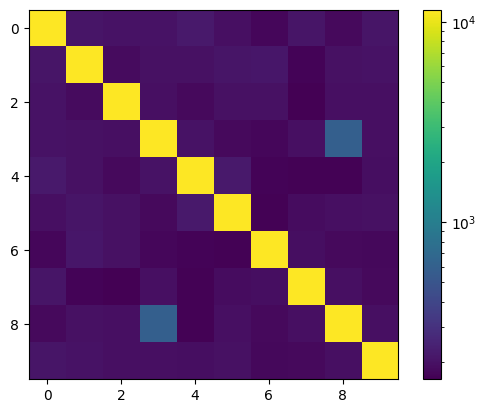

In [18]:
messages = []
msg_num = 10
result = np.ndarray(shape=(msg_num, msg_num))

for i in range(msg_num):
    file = open(f"msg{i}.txt", encoding="utf8")
    messages.append(file.read())
    file.close()

for i in range(msg_num):
    for j in range(msg_num):
        msg_sum = add_str(messages[i], messages[j])

        zeroes_counter = 0
        for k in range(len(msg_sum)):
            if ord(msg_sum[k]) == 0:
                zeroes_counter += 1

        result[i, j] = zeroes_counter

plt.imshow(result, norm=LogNorm())
plt.colorbar()
plt.show()

Merged messages with the most zeroes are of course the messages merged with themselves.

We can observe that second most merge of messages that has a lot of zeroes is merge of messages 8 amd 3. Probably these messages were encrypted using the same key. 